<a href="https://colab.research.google.com/github/shaifali1102/Supervised-Learning/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

- Bayes theorem:
  $$
  P(A|B) = \frac{P(B|A)*P(A)}{P(B)}
  $$
  $$
  Posterior~Prob = \frac{Likelihood*Prior~Prob}{Marginal~Prob}
  $$

- Naive Assumption: P(B|A) is independent
    - not always true but reasonal assumption to make

- For Spam classification
    $$
    P_{i}(y=1|X) = \frac{P(X|y=1)*P(y=1)}{P(X)}
    $$
    $$
    P_{i}(y=0|X) = \frac{P(X|y=0)*P(y=0)}{P(X)}
    $$

    where $X = text = w_1,w_2,w_3,...w_d$

    $$
    P(y=1|X) = \frac{P(y=1) * Π_{i=1}^d P(w_i|y=1)}{P(X)}
    $$

    $$
    P(y=0|X) = \frac{P(y=0) * Π_{i=1}^d P(w_i|y=0)}{P(X)}
    $$

    where class priors are calculated as:
    
    $P(y=1) = \frac{Number \ of \ samples \ with \ y_i=1}{Total \ number \ of \ samples}$, $P(y=0) = \frac{Number \ of \ samples\ with \ y_i=0}{Total \ number \ of \ samples}$

    and likelihoods as:

    $P(w_{j}|y_{i}=1) = \frac{P(w_{j} \cap y_{i}=1)}{P(y_{i}=1)} $, $P(w_{j}|y_{i}=0) = \frac{P(w_{j} \cap y_{i}=0)}{P(y_{i}=0)} $

- Train and Test time complexity
  - train: O(nd)
      - we have to compute d likelihoods for all n features
  - space: O(d)
  - test: O(k) where k is no of words

- Laplace smoothening
  - naive bayes fails to predict $y_q$ if any word in $x_q$ is not in the training dataset

      1. class priors become 0
          $P(y=1|w_{1}, w_{2}, w_{6}, w_{7}, w') = P(y=1)*P(w_{1}|y=1)*P(w_{2}|y=1)..*P(w'|y=1) $

          As w' has never been in the training dataset, the occurence of word w′ when $y_i = 1$ will be 0 (i.e. $n_{w'_1} = 0$),
    
          hence $P(w'|y=1) = 0$ which makes $P(y=1|w_{1}, w_{2}, w_{6}, w_{7}, w') = 0 $
      
      2. likelihood also becomes 0:
          
          $P(w'|y=1) = \frac{n'_1}{n_1} = \frac{0}{n_1} = 0$
    
  - we add a constant $\alpha$ for $n'_1$ and $c\alpha$ for $n_1$
      - this is called laplace/additive smoothening
      $$
      P(w'|y=1) = \frac{n'_1 + \alpha}{n_1 + c\alpha}
      $$
      where c = 2 for binary classification

- Bias-Variance Tradeoff
    - as $\alpha$ increases, model underfits
    - as $\alpha$ decreases, model overfits
        - the likelihood with the added constants of Laplace smoothing become closer to the likelihood without Laplace Smoothing.

- Imbalanced data
    - model is affected
        - as the class prior($P(y=1)$ or $P(y=0)$) will be imbalanced impacting the overall prediction
        - $P(y=0|text) = P(text) * P(y=0)$ will come out greater because $P(y=0) > P(y=1)$
    - after rebalancing($P(y=1)$ = $P(y=0) = 0.5$) the likelihood will dominate the prediction instead of the class prior

- Underflow problem
  - class prior and likelihood both are [0,1] range
  - however likelihoods are very small values and when taking a product the computer can only store a limited float value
  - as d increases, likelihoods become even smaller
  - this issue of the resultant value becoming too small is what is called Underflow Problem.
  - solution: taking log
  
    $log ( p(y=1|w_1,w_2..2_d) ) = log [ P(y=1) ∏_{j=1}^{d} P(w_j|y=1)] $

    $log ( p(y=1|w_1,w_2..2_d) ) = log [ P(y=1)] + ∑_{j=1}^{d} log[ P(w_j|y=1)] $

    since $log(ab) = log(a) + log(b)$

- Feature Importance
    - the word with the top likelihood is considered the most important
    eg, $P(w_1|y=1) = 0.01$, $P(w_3|y=1) = 0.01$, $P(w_6|y=1) = 0.8$ , $P(w_7|y=1) = 0.2$
    - here, we can say that the word $w_6$ and $w_7$ are the ones that effect the decision, with $w_6$ being the most important feature

- Outliers
    - word $w'$ in test that does not appear in training data, is considered an outlier, which can be treated with laplace smoothening
    - in training, words that appear rarely eg, $P(w_j|y=1) = \frac{1}{1000}$.
      - Outlier treatment:
          1. we use a slightly high $\alpha$
          2. if the $w_j$ occurs above a threshold, say 10, only then we consider the word in likelihood calculation

- Multinomial Naive Bayes is computationally expensive

- standardization is not required because naive bayes is not distance based but rather information based algorithm





## Spam Classification

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
!gdown 1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8

Downloading...
From: https://drive.google.com/uc?id=1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8
To: /content/spam_clean.csv
100% 484k/484k [00:00<00:00, 88.5MB/s]


In [11]:
df = pd.read_csv('spam_clean.csv', encoding='latin-1') #encoding='latin-1' to explicitly mention that the letters are in english
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df['type'].value_counts()

,count
type,
ham,4825
spam,747


the data is imbalanced

### Preprocessing

1. tokenization - spliting sentences into individual tokens(words)
2. lower casing - sentences are looked at with case insensitivity, hence converted
3. remove punctuations
4. remove stop words - words like a, an, the, of, do, she etc don't add very little information

In [13]:
# lib for test processing
import re, nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

def clean_sentence(s):
  cleaned_s = ''

  # 1. tokenization
  words = word_tokenize(s)

  for word in words:
    # 2. lower case
    clean_w = word.lower()

    # 3. remove punctuations
    clean_w = re.sub(r'[^\w\s]', '', clean_w)

    # 4. remove stop words + 2 and 3
    if clean_w != '' and clean_w not in stopwords.words('english'):
      cleaned_s += ' ' + clean_w

  return cleaned_s.strip()




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [15]:
df['cleaned_message'] = df['message'].apply(clean_sentence)
df.head()

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though


In [16]:
from collections import Counter

ham = " ".join(df[df['type'] == 'ham']['cleaned_message'])
ham_counter = Counter(ham.split()).most_common(20)
ham_counter

[('u', 1004),
 ('nt', 360),
 ('gt', 318),
 ('lt', 316),
 ('2', 309),
 ('get', 303),
 ('ok', 279),
 ('go', 248),
 ('got', 244),
 ('ur', 241),
 ('know', 236),
 ('like', 231),
 ('call', 231),
 ('good', 229),
 ('come', 227),
 ('time', 197),
 ('day', 192),
 ('love', 191),
 ('4', 172),
 ('going', 169)]

In [20]:
spam = " ".join(df[df['type'] == 'spam']['cleaned_message'])
spam_counter = Counter(spam.split()).most_common(20)
spam_counter

[('call', 347),
 ('free', 219),
 ('2', 176),
 ('u', 159),
 ('txt', 156),
 ('ur', 144),
 ('mobile', 123),
 ('4', 123),
 ('text', 121),
 ('stop', 116),
 ('claim', 113),
 ('reply', 104),
 ('prize', 92),
 ('get', 84),
 ('new', 69),
 ('send', 68),
 ('nokia', 65),
 ('urgent', 63),
 ('cash', 62),
 ('win', 60)]

#### Visualizing



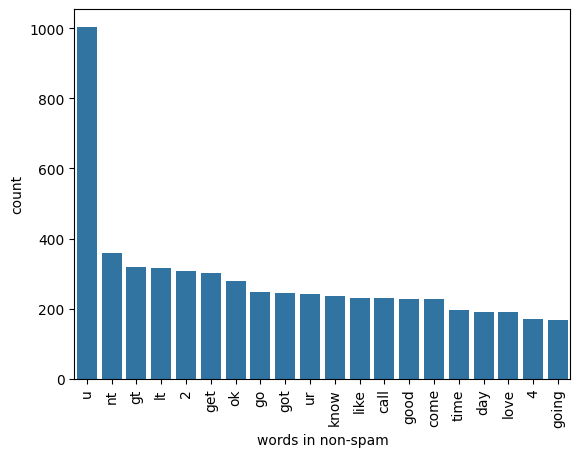

In [18]:
df_ham = pd.DataFrame(ham_counter, columns=['words in non-spam','count'])
sns.barplot(df_ham, x='words in non-spam', y= 'count')
plt.xticks(rotation=90)
plt.show()

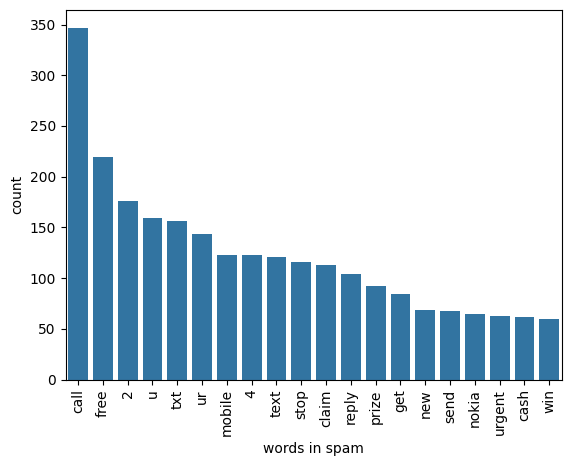

In [19]:
df_spam = pd.DataFrame(spam_counter, columns=['words in spam','count'])
sns.barplot(df_spam, x='words in spam', y= 'count')
plt.xticks(rotation=90)
plt.show()

In [21]:
# Converting type to categorical feature

df['type'] = df['type'].map({'spam':1, 'ham':0})
df.head()

,type,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though


In [27]:
# train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['type'], test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4179,) (4179,)
(1393,) (1393,)


In [28]:
# naive bayes

from sklearn import feature_extraction, naive_bayes, metrics

# count vectorizer
f = feature_extraction.text.CountVectorizer()

X_train = f.fit_transform(X_train)
X_test = f.transform(X_test)

print(X_train.shape, X_test.shape)

(4179, 7615) (1393, 7615)


In [29]:
# hyperparam tuning
params = {
    'alpha': [0.01,0.1,1,10]
}

In [30]:
from sklearn.model_selection import GridSearchCV

nb = naive_bayes.MultinomialNB()
gs = GridSearchCV(nb, params, cv=5, scoring='f1')

gs.fit(X_train, y_train)

res = gs.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")



Parameters:{'alpha': 0.01} Mean_score: 0.9146814872939479 Rank: 1
Parameters:{'alpha': 0.1} Mean_score: 0.903153055468627 Rank: 3
Parameters:{'alpha': 1} Mean_score: 0.908997580693341 Rank: 2
Parameters:{'alpha': 10} Mean_score: 0.8774351739612618 Rank: 4


best performance is with $\alpha = 0.01$

In [32]:
nb = naive_bayes.MultinomialNB(alpha=0.1)
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print(metrics.f1_score(y_test, y_pred))

0.9230769230769231


multinomial naive bayes is not affected by class priors even when class is imbalanced